In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor
import os
from sklearn import tree
import matplotlib.pyplot as plt

In [20]:
# Đọc dữ liệu từ tệp CSV vào DataFrame
data = pd.read_csv('real_estate_processed.csv')

In [21]:
# Chọn các đặc trưng và nhãn
X = data[['size', 'rooms','category_name','area_name','size','street_name']]
y = data['price'] # Giá là nhãn cần dự đoán

In [22]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Khởi tạo và huấn luyện mô hình Decision Tree
model = DecisionTreeRegressor(random_state=1)

In [24]:
# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

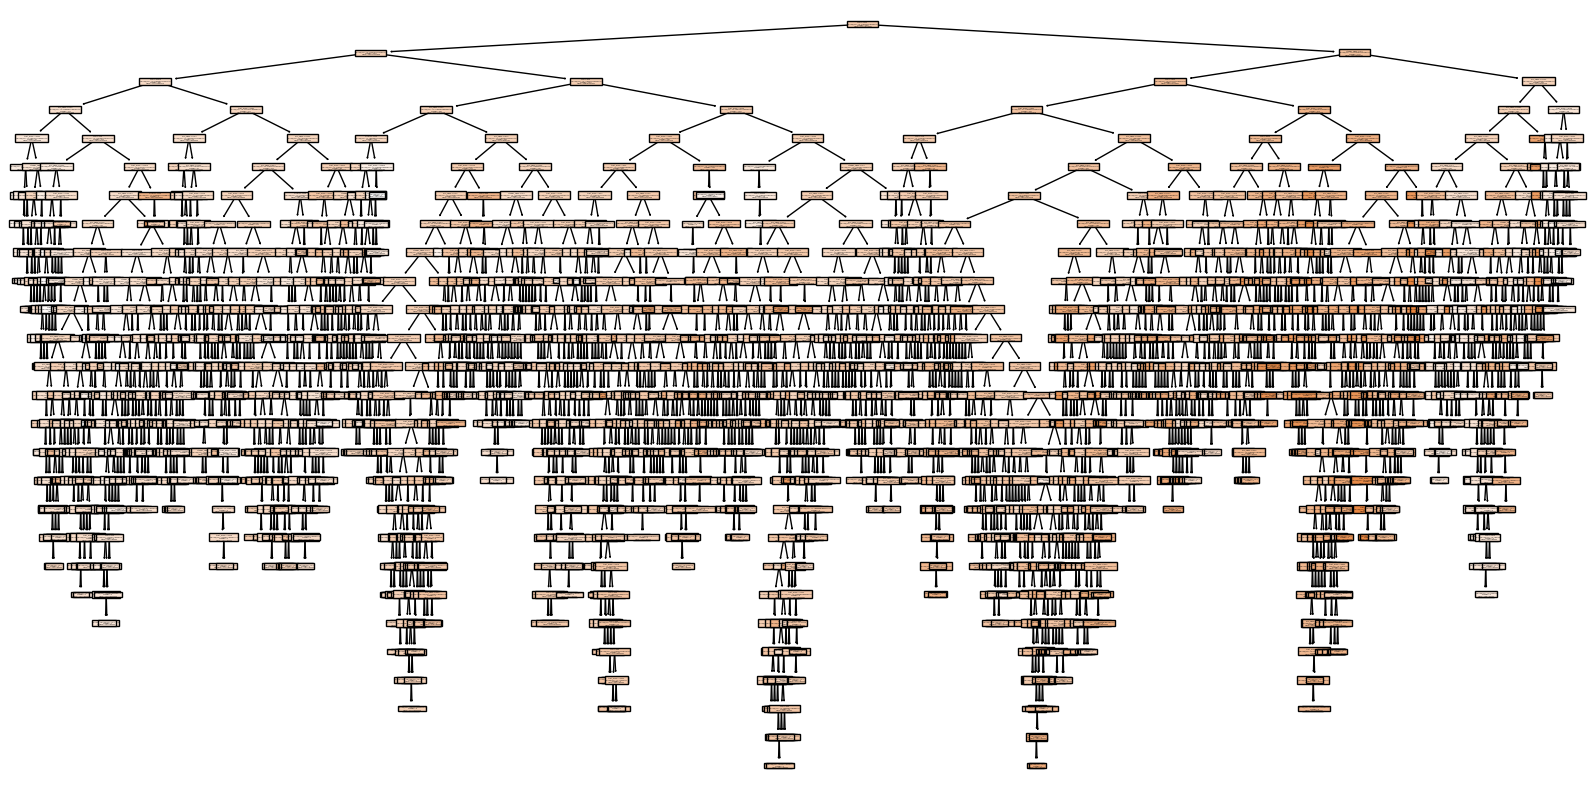

In [25]:


# Vẽ cây quyết định
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [27]:

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
test_score = model.score(X_test, y_test)
print("Độ chính xác của :", test_score)

Điểm số trên tập kiểm tra: 0.458630367161437
